In [2]:
#importing necessary libraries for the project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
%matplotlib inline


DATA EXPLORATION 

In [3]:

import os
import pandas as pd

data = pd.read_csv("NLP.DATA.csv")
data.head()

Agha Khan Comments  Agha Khan Ratings  \
0  I got the best services. The environment is al...                5.0   
1  The Aga Khan University Hospital in Parklands,...                5.0   
2  Horrible experience with the A&E. Not an ounce...                1.0   
3  This used to be a very great patient-centered ...                1.0   
4  Parking.. Hectic\r\nReception takes over an ho...                3.0   

  Agha Khan Sentiment                                    Coptic Comments  \
0            positive  Great Nursing and hospitality services. They a...   
1            positive  I was transferred to this hospital via ambulan...   
2            positive  Wuuueeeehhh....\r\nThe place is amazing..I mea...   
3            positive  I've visited the hospital twice, first time al...   
4            positive  The hospital is amazing. Its an awesome place ...   

   Coptic Ratings Coptic sentiment  \
0             3.0         positive   
1             1.0         negative   
2             3.0         negative   
3             1.0         positive   
4             4.0         positive   

                                   Kenyatta Comments  Kenyatta Rating  \
0  Kenyatta National Hospital provides a pleasant...              2.0   
1  I must commend Kenyatta National Hospital for ...              3.0   
2  This hospital environment and the services hav...              5.0   
3  Am at 6 Doctor plaza where I need to do my lab...              1.0   
4  The hospital is huge and expansive. The aesthe...              3.0   

  Kenyatta sentiment                       Kenyatta University Comments  ...  \
0           positive  I like that the hospital is state-of-the-art a...  ...   
1           positive  Kenyatta at nice it cute and safe, we are here...  ...   
2           positive  Very modern and clean. Unfortunately, a very w...  ...   
3           negative  Very modern and clean, though a warped visitat...  ...   
4           negative  I went late at night. I was attended to immedi...  ...   

                               Nairobi West Comments Nairobi West Ratings  \
0  I had an excellent experience at The Nairobi W...                  5.0   
1  Probably one of the trusted and most efficient...                  5.0   
2  The experience was horrible. My mom was there ...                  1.0   
3  I visited the hospital on 6.12.2023. I was the...                  2.0   
4  The service was impeccable. I'm amazed how fas...                  5.0   

  Nairobi West sentiment                                   Pumwani Comments  \
0               positive  I enjoyed their service i can't complain well ...   
1               positive  The hospital is well equipped,friendly qualifi...   
2               negative  Currently Pumwani is very clean and has profes...   
3               negative  Friendly guards. Limited parking space to staf...   
4               positive        Location was good.\r\nFacility has improved   

  Pumwani Ratings Pumwani sentiment  Unnamed: 30  \
0             5.0          positive          NaN   
1             4.0          positive          NaN   
2             5.0          positive          NaN   
3             5.0          positive          NaN   
4             5.0          positive          NaN   

                                              REVIEW SENTIMENT  RATING  
0  I got the best services. The environment is al...  positive       5  
1  The Aga Khan University Hospital in Parklands,...  positive       5  
2  Horrible experience with the A&E. Not an ounce...  positive       1  
3  This used to be a very great patient-centered ...  positive       1  
4  Parking.. Hectic\r\nReception takes over an ho...  positive       3  

[5 rows x 34 columns]

In [4]:


# Selecting the columns i want to keep
selected_columns = ['REVIEW', 'SENTIMENT', 'RATING']

# Creating a new DataFrame with only the selected columns
df = data[selected_columns].copy()

df.head()

REVIEW SENTIMENT  RATING
0  I got the best services. The environment is al...  positive       5
1  The Aga Khan University Hospital in Parklands,...  positive       5
2  Horrible experience with the A&E. Not an ounce...  positive       1
3  This used to be a very great patient-centered ...  positive       1
4  Parking.. Hectic\r\nReception takes over an ho...  positive       3

In [5]:
df.tail()

REVIEW SENTIMENT  RATING
3527                                    Maternity care.  positive       1
3528  It is a good hospital as I see it from the out...  positive       5
3529                                          God bless  positive       5
3530                                               good  positive       4
3531                                      And the wages  positive       4

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3532 entries, 0 to 3531
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   REVIEW     3532 non-null   object
 1   SENTIMENT  3532 non-null   object
 2   RATING     3532 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 82.9+ KB


Insights from the Dataset
After importing the dataset, my first step is to check if the data is imported properly, so that i can use.


Data Preprocessing
cleaning the scrapped data by removing the irrelevant columns and any noisy information
Handling missing values by either imputing them with the mean value or using the standard deviation
Performing text processing techniques by using techniques like tokenization, filtering, removing stop words, stemming and lammatization to prepare the review data for analysis.


In [7]:
import nltk

df['WORD_COUNTS'] = df['REVIEW'].apply(lambda x: len(nltk.word_tokenize(x)))
df['CHAR_COUNTS'] = df['REVIEW'].apply(lambda x: len(x))
df['AVG_WORDLENGTH'] = df['CHAR_COUNTS'] / df['WORD_COUNTS']
df['STOPWORDS_COUNTS'] = df['REVIEW'].apply(lambda x: len([word for word in nltk.word_tokenize(x) if word.lower() in nltk.corpus.stopwords.words('english')]))


In [8]:
#Descriptive statistics analysis
df.describe(include='all')

REVIEW SENTIMENT       RATING  WORD_COUNTS  CHAR_COUNTS  \
count    3532      3532  3532.000000  3532.000000  3532.000000   
unique   3231         2          NaN          NaN          NaN   
top      Good  positive          NaN          NaN          NaN   
freq       35      2760          NaN          NaN          NaN   
mean      NaN       NaN     3.715176    20.631653   106.214326   
std       NaN       NaN     1.604252    17.340394    85.415241   
min       NaN       NaN     1.000000     1.000000     2.000000   
25%       NaN       NaN     2.000000     6.000000    33.000000   
50%       NaN       NaN     5.000000    15.000000    79.000000   
75%       NaN       NaN     5.000000    33.000000   169.000000   
max       NaN       NaN     5.000000    75.000000   337.000000   

        AVG_WORDLENGTH  STOPWORDS_COUNTS  
count      3532.000000       3532.000000  
unique             NaN               NaN  
top                NaN               NaN  
freq               NaN               NaN  
mean          5.453676          8.040770  
std           1.103546          7.950643  
min           1.000000          0.000000  
25%           4.818182          1.000000  
50%           5.266667          5.000000  
75%           5.888889         13.000000  
max          12.500000         37.000000

By assigning include attribute a value of ‘all’, i make sure that categorical features are also included in the result.


Data Cleaning.

1. Handling Missing Values


In [9]:
#size of the dataset
#check the number of observations (rows) and features (columns) in the dataset
print(df.shape)

(3532, 7)


In [10]:
for column in df.columns:
    num_unique_values = df[column].nunique()
    print(f'Number of unique values in {column}: {num_unique_values}')


Number of unique values in REVIEW: 3231
Number of unique values in SENTIMENT: 2
Number of unique values in RATING: 5
Number of unique values in WORD_COUNTS: 74
Number of unique values in CHAR_COUNTS: 326
Number of unique values in AVG_WORDLENGTH: 979
Number of unique values in STOPWORDS_COUNTS: 37


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3532 entries, 0 to 3531
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   REVIEW            3532 non-null   object 
 1   SENTIMENT         3532 non-null   object 
 2   RATING            3532 non-null   int64  
 3   WORD_COUNTS       3532 non-null   int64  
 4   CHAR_COUNTS       3532 non-null   int64  
 5   AVG_WORDLENGTH    3532 non-null   float64
 6   STOPWORDS_COUNTS  3532 non-null   int64  
dtypes: float64(1), int64(4), object(2)
memory usage: 193.3+ KB


The dataset comprises diverse features, each falling into distinct data types. Categorical features, such as ‘Agha Khan Comments,’ ‘,’ ‘Coptic Comments ,’ ‘Kenyatta Comments,’ and ‘Kenyatta University Comments,’ are represented as objects (strings).

The ‘Ratings’ feature is expressed as a float (float64), capturing decimal precision information.


Univariate analysis
#helps in understanding the distribution and characteristics of a single variable, aiding in pattern recognition, summarization, and statistical exploration.


<Axes: xlabel='RATING', ylabel='Count'>

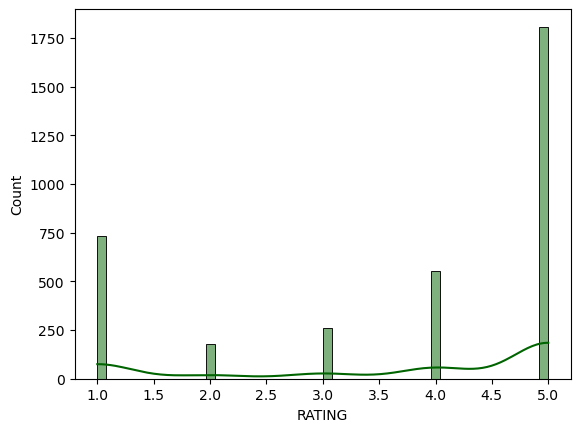

In [12]:
#Question: What is the distribution of Agha Khan Ratings from the patients?
import seaborn as sns
sns.histplot(df['RATING'], bins=50, kde=True, color='darkgreen')

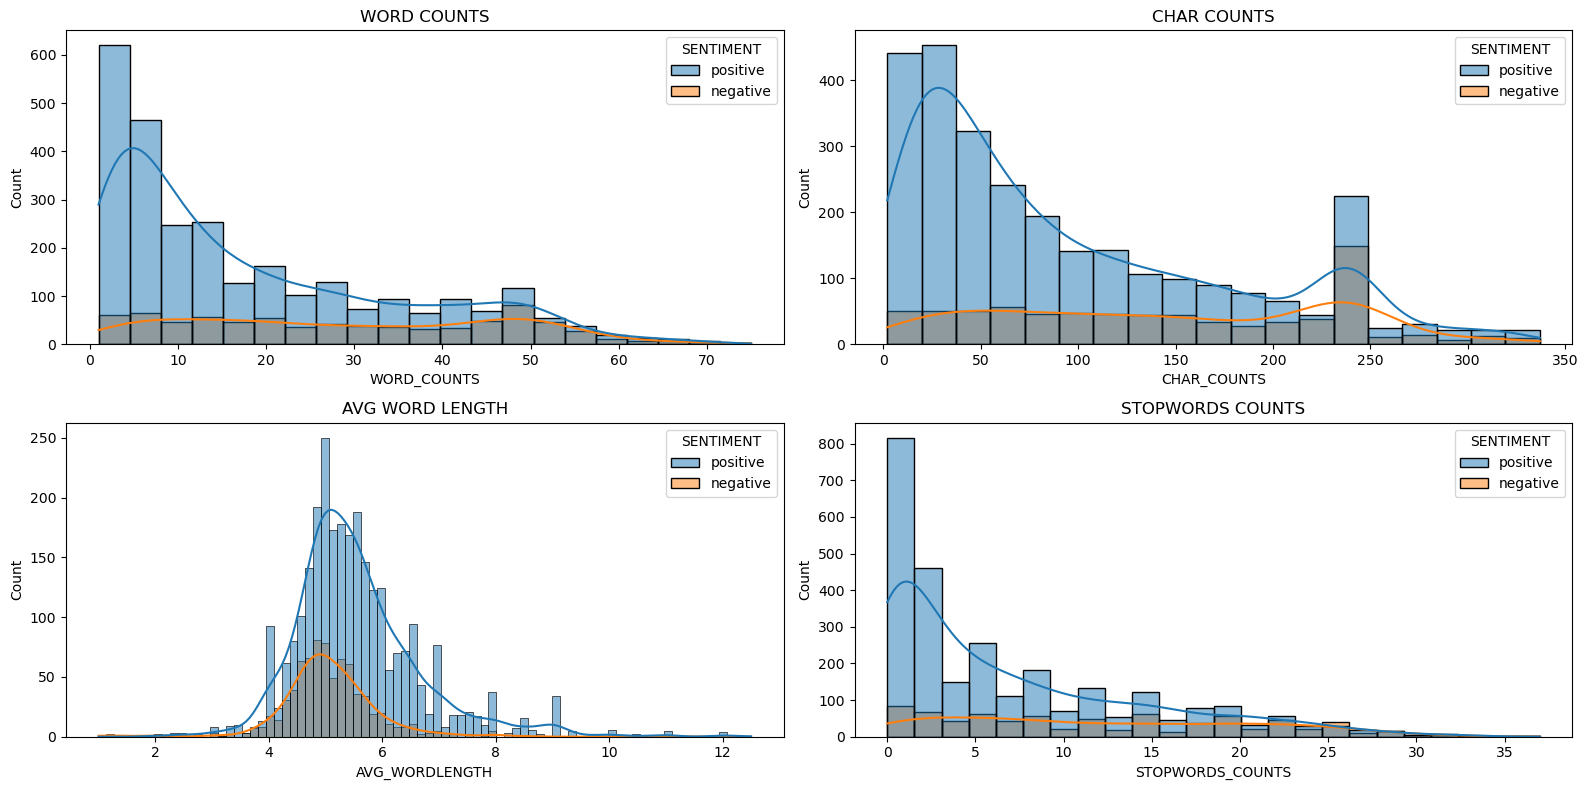

In [13]:
plt.figure(figsize=(16,8))

plt.subplot(2,2,1)
# sns.barplot(x='sentiment', y='word_counts', data=df)
sns.histplot(data=df, x='WORD_COUNTS', hue='SENTIMENT', kde=True)
plt.title('WORD COUNTS')

plt.subplot(2,2,2)
sns.histplot(data=df, x='CHAR_COUNTS', hue='SENTIMENT', kde=True)
plt.title('CHAR COUNTS')

plt.subplot(2,2,3)
sns.histplot(data=df, x='AVG_WORDLENGTH', hue='SENTIMENT', kde=True)
plt.title('AVG WORD LENGTH')

plt.subplot(2,2,4)
sns.histplot(data=df, x='STOPWORDS_COUNTS', hue='SENTIMENT', kde=True)
plt.title('STOPWORDS COUNTS')

plt.tight_layout()
plt.show()

The presence of a kernel density estimate (kde=True) indicates the smoothed probability density function, providing insights into the underlying distribution pattern.

The presence of a kernel density estimate (kde=True) indicates the smoothed probability density function, providing insights into the underlying distribution pattern.

Analysis: The distribution appears to be right-skewed, with a mode (the most frequent value) at around 5 positive Ratings. There are also a many data points at the higher end of the distribution. The left tail of the distribution is shorter than the right tail, which means that there are less data points with lower numbers of positive ratings than there are on the right tail.


Natural language processing


In [14]:
# check if there are any null values
df.isnull().values.any()

False

In [15]:
# check how many null values
df.isnull().values.sum()

0

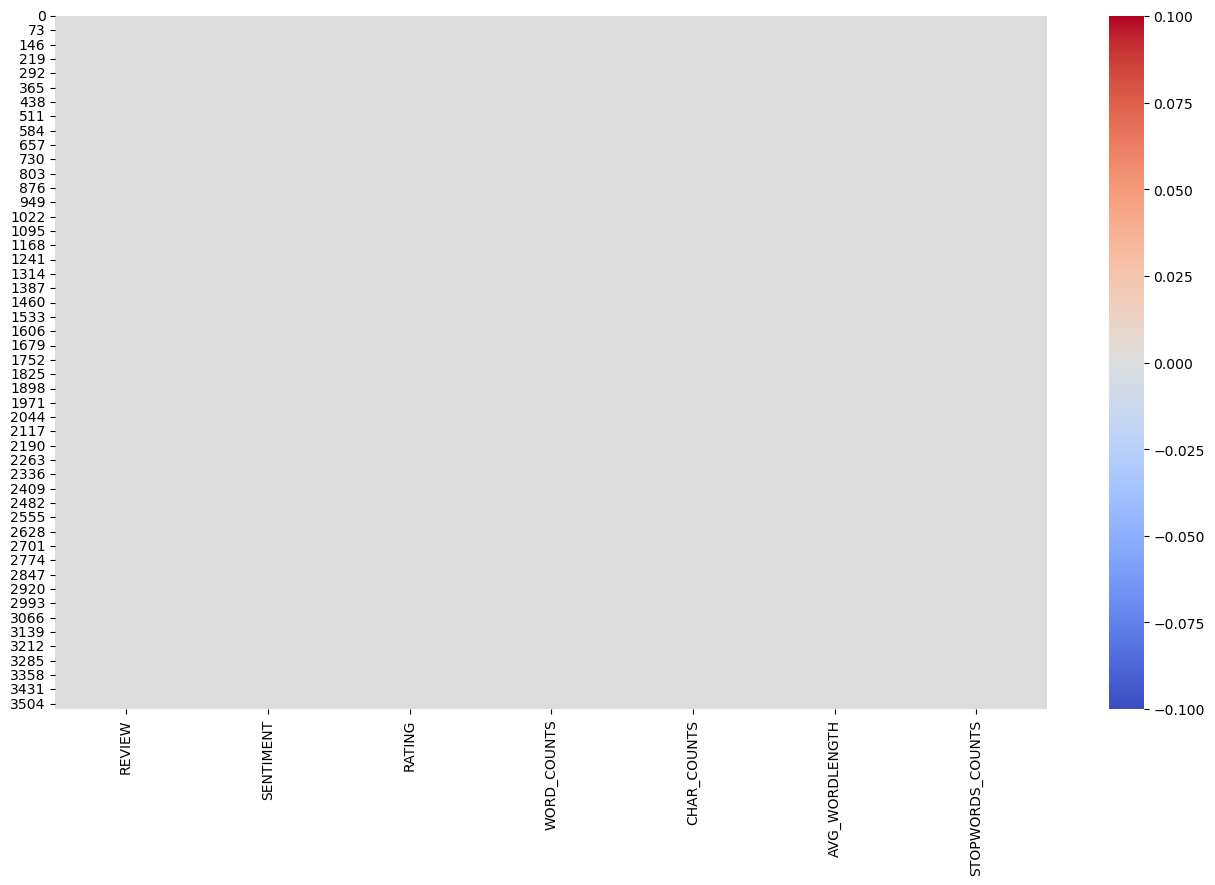

In [16]:
# show the null values using the heatmap
import matplotlib.pyplot as plt
plt.figure(figsize=(16,9))
sns.heatmap(data=df.isnull(), cmap='coolwarm')
plt.show()

In [17]:

import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import sklearn

import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, LancasterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize, RegexpTokenizer

import argparse

DATA EXPLORATION


In [18]:
df.loc[20, 'REVIEW']

"All medical services are here plus financial services, restaurant and cafeteria. Clean and doesn't give off the feel of being in a hospital"

In [19]:

df.loc[20, 'SENTIMENT']



'positive'

<function matplotlib.pyplot.show(close=None, block=None)>

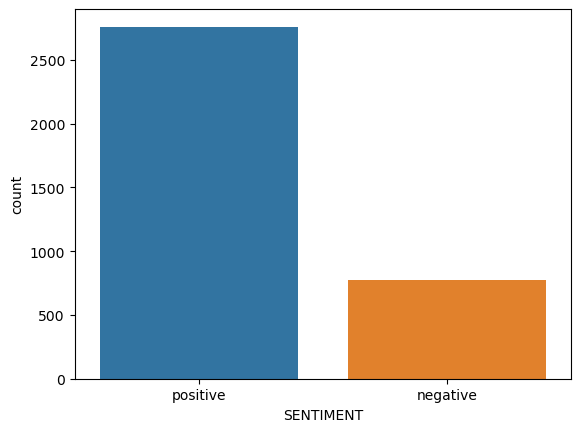

In [20]:
#bar plot of sentiment
sns.countplot(x = "SENTIMENT", data = df)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

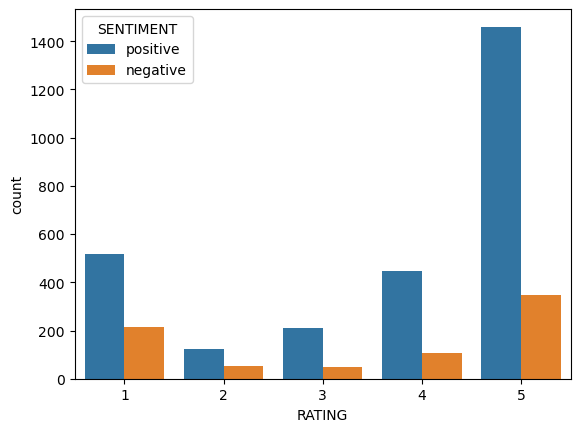

In [21]:
# checking the relationship between Ratings and sentiments
sns.countplot(x = 'RATING', data = df, hue= 'SENTIMENT' )
plt.show

Text(0.5, 1.0, 'WORD COUNTS')

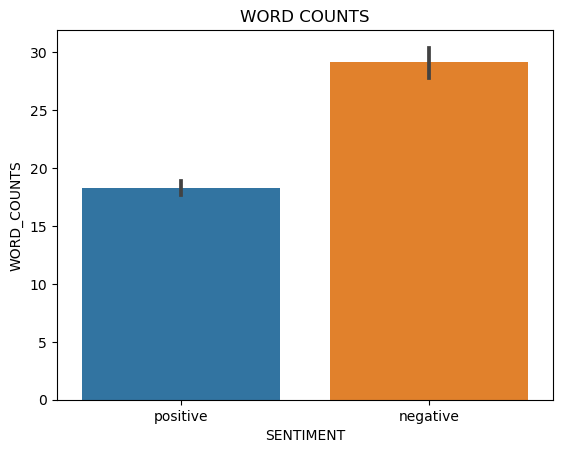

In [22]:
import seaborn as sns    
sns.barplot(x='SENTIMENT', y='WORD_COUNTS', data=df)
plt.title('WORD COUNTS')

Text(0.5, 1.0, 'CHAR COUNTS')

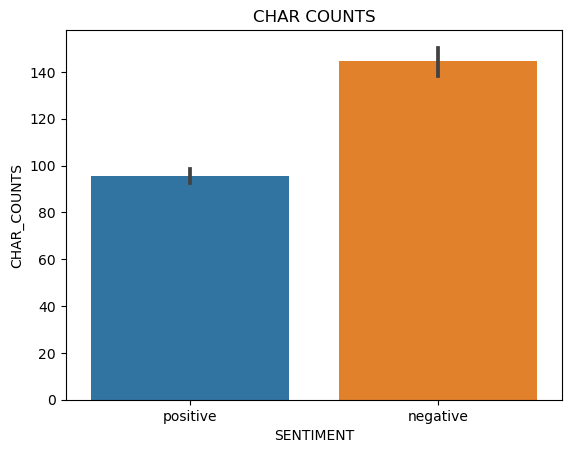

In [23]:
import seaborn as sns    
sns.barplot(x='SENTIMENT', y='CHAR_COUNTS', data=df)
plt.title('CHAR COUNTS')

Text(0.5, 1.0, 'AVG_WORDLENGTH')

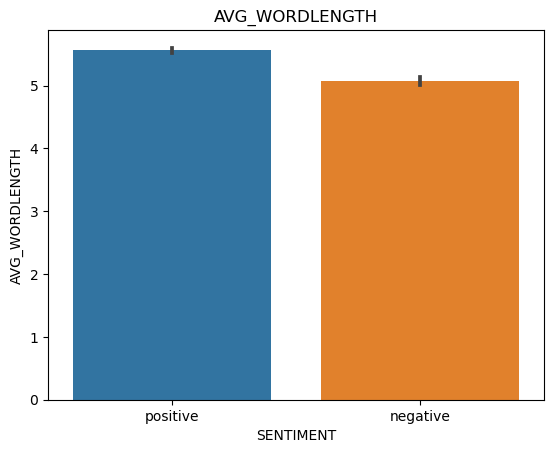

In [24]:
sns.barplot(x='SENTIMENT', y='AVG_WORDLENGTH', data=df)
plt.title('AVG_WORDLENGTH')

Text(0.5, 1.0, 'STOPWORDS_COUNTS')

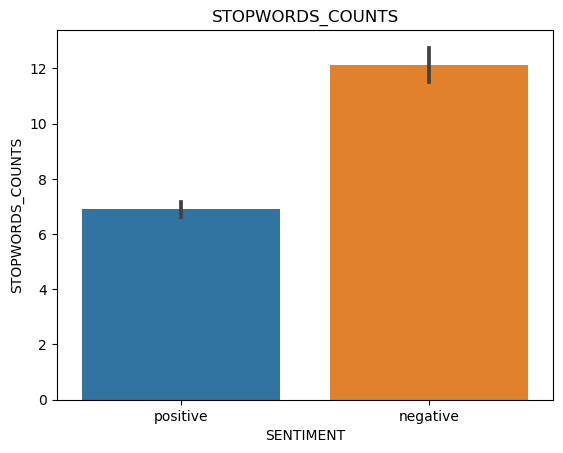

In [25]:
sns.barplot(x='SENTIMENT', y='STOPWORDS_COUNTS', data=df)
plt.title('STOPWORDS_COUNTS')

In [26]:
df['SENTIMENT'].value_counts()

positive    2760
negative     772
Name: SENTIMENT, dtype: int64

In [27]:
df.head()

REVIEW SENTIMENT  RATING  \
0  I got the best services. The environment is al...  positive       5   
1  The Aga Khan University Hospital in Parklands,...  positive       5   
2  Horrible experience with the A&E. Not an ounce...  positive       1   
3  This used to be a very great patient-centered ...  positive       1   
4  Parking.. Hectic\r\nReception takes over an ho...  positive       3   

   WORD_COUNTS  CHAR_COUNTS  AVG_WORDLENGTH  STOPWORDS_COUNTS  
0           38          169        4.447368                16  
1           40          233        5.825000                15  
2           58          242        4.172414                30  
3           40          230        5.750000                15  
4           36          179        4.972222                15

In [28]:
df.columns

Index(['REVIEW', 'SENTIMENT', 'RATING', 'WORD_COUNTS', 'CHAR_COUNTS',
       'AVG_WORDLENGTH', 'STOPWORDS_COUNTS'],
      dtype='object')

In [29]:
print(df.columns.values)

['REVIEW' 'SENTIMENT' 'RATING' 'WORD_COUNTS' 'CHAR_COUNTS'
 'AVG_WORDLENGTH' 'STOPWORDS_COUNTS']


In [30]:
df['SENTIMENT'].value_counts()

positive    2760
negative     772
Name: SENTIMENT, dtype: int64

In [31]:
#checking any relationship between a review and sentiment
data = pd.DataFrame()  # Define the "data" variable as an empty DataFrame
data['len'] = df['REVIEW'].apply(len)

In [32]:
data['len'].describe()


count    3532.000000
mean      106.214326
std        85.415241
min         2.000000
25%        33.000000
50%        79.000000
75%       169.000000
max       337.000000
Name: len, dtype: float64

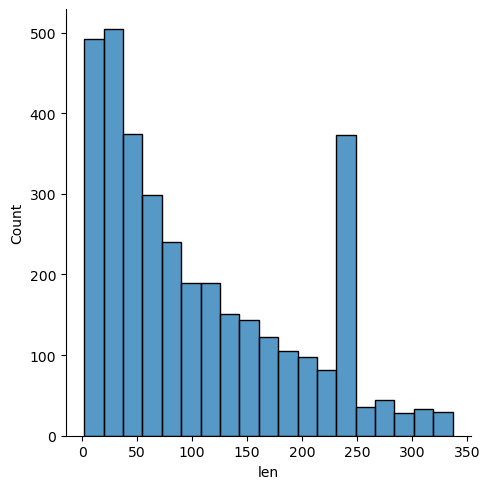

In [33]:
#sns.displot(df, x = 'len', kind='kde', bins=30, fill=True, hue='Agha Khan Sentiment')
sns.displot(data['len'])

TOKENIZATION

In [34]:
#tokenization
#processing of data
#taking columns am intrested in 
data = df[['REVIEW', 'SENTIMENT']]


In [35]:
#tokenization is breaking a text into different parts and tokens
#sentences tokenizer help us to break text into sentences
#word tokenizer help us to break text into individual words
data.loc[13, 'REVIEW']
#viewing of a review

'The guards/staff could not give proper directions when I inquired. I wasted more than an hour when directed to the wrong place, took a ticket only to be told I need to start afresh elsewhere! I had to go to another hospital.'

In [36]:
sent_tokenize(df.loc[13, 'REVIEW'])
#breaking the text into two sentences

['The guards/staff could not give proper directions when I inquired.',
 'I wasted more than an hour when directed to the wrong place, took a ticket only to be told I need to start afresh elsewhere!',
 'I had to go to another hospital.']

In [37]:
#Var tokenizer
#breaking sentences into individual words
word_tokenize(df.loc[13, 'REVIEW'])


['The',
 'guards/staff',
 'could',
 'not',
 'give',
 'proper',
 'directions',
 'when',
 'I',
 'inquired',
 '.',
 'I',
 'wasted',
 'more',
 'than',
 'an',
 'hour',
 'when',
 'directed',
 'to',
 'the',
 'wrong',
 'place',
 ',',
 'took',
 'a',
 'ticket',
 'only',
 'to',
 'be',
 'told',
 'I',
 'need',
 'to',
 'start',
 'afresh',
 'elsewhere',
 '!',
 'I',
 'had',
 'to',
 'go',
 'to',
 'another',
 'hospital',
 '.']

CONVERTING TEXT TO LOWERCASE.

In [38]:

reviews = list(df['REVIEW'])

In [39]:
#viewing the length od the review
len(reviews)

3532

In [40]:
reviews[13]

'The guards/staff could not give proper directions when I inquired. I wasted more than an hour when directed to the wrong place, took a ticket only to be told I need to start afresh elsewhere! I had to go to another hospital.'

In [41]:
#converting review to lower case
reviews[13].lower()

'the guards/staff could not give proper directions when i inquired. i wasted more than an hour when directed to the wrong place, took a ticket only to be told i need to start afresh elsewhere! i had to go to another hospital.'

In [42]:
#applying the .lower function to all other reviews
reviews_lower = [r.lower() for r in reviews]

In [43]:
#means the same as the code above
reviews_lower = []
for r in reviews:
    reviews_lower.append(r.lower())

In [44]:
#breaking down words into individual words inform of a list
tokens = [word_tokenize(r) for r in reviews_lower]
tokens[13]

['the',
 'guards/staff',
 'could',
 'not',
 'give',
 'proper',
 'directions',
 'when',
 'i',
 'inquired',
 '.',
 'i',
 'wasted',
 'more',
 'than',
 'an',
 'hour',
 'when',
 'directed',
 'to',
 'the',
 'wrong',
 'place',
 ',',
 'took',
 'a',
 'ticket',
 'only',
 'to',
 'be',
 'told',
 'i',
 'need',
 'to',
 'start',
 'afresh',
 'elsewhere',
 '!',
 'i',
 'had',
 'to',
 'go',
 'to',
 'another',
 'hospital',
 '.']

In [45]:
tokens


[['i',
  'got',
  'the',
  'best',
  'services',
  '.',
  'the',
  'environment',
  'is',
  'also',
  'serene',
  ',',
  'you',
  'wo',
  "n't",
  'even',
  'realize',
  'that',
  'you',
  "'re",
  'in',
  'a',
  'hospital',
  '.',
  'i',
  'felt',
  'at',
  'home',
  'here',
  '.',
  'i',
  'was',
  'attended',
  'to',
  'without',
  'an',
  'appointment',
  '.'],
 ['the',
  'aga',
  'khan',
  'university',
  'hospital',
  'in',
  'parklands',
  ',',
  'nairobi',
  'is',
  'a',
  'medical',
  'institution',
  'that',
  'impresses',
  'on',
  'many',
  'fronts',
  '.',
  'the',
  'service',
  'was',
  'outstanding',
  ';',
  'from',
  'the',
  'moment',
  'of',
  'arrival',
  ',',
  'the',
  'staff',
  'exhibited',
  'an',
  'exceptional',
  'level',
  'of',
  'professionalism',
  'and',
  '�'],
 ['horrible',
  'experience',
  'with',
  'the',
  'a',
  '&',
  'e',
  '.',
  'not',
  'an',
  'ounce',
  'of',
  'care',
  'at',
  'all',
  '.',
  'if',
  'it',
  'was',
  'possible',
  'to',

STOP WORDS REMOVAL

In [46]:
#stop words removal
#tokens contains words that are not useful in the sentence 
#so i will remove them using stopwords
#stopwords are words that are not useful in a sentence
#nltk and corpus library has a list of stopwords
#corpus has a list of stopwords in different languages

sw = stopwords.words('english')

In [47]:
sw

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [48]:
tokens[13]

['the',
 'guards/staff',
 'could',
 'not',
 'give',
 'proper',
 'directions',
 'when',
 'i',
 'inquired',
 '.',
 'i',
 'wasted',
 'more',
 'than',
 'an',
 'hour',
 'when',
 'directed',
 'to',
 'the',
 'wrong',
 'place',
 ',',
 'took',
 'a',
 'ticket',
 'only',
 'to',
 'be',
 'told',
 'i',
 'need',
 'to',
 'start',
 'afresh',
 'elsewhere',
 '!',
 'i',
 'had',
 'to',
 'go',
 'to',
 'another',
 'hospital',
 '.']

In [49]:

tokens = [[word for word in t if word not in sw] for t in tokens]


In [50]:
tokens[13]

['guards/staff',
 'could',
 'give',
 'proper',
 'directions',
 'inquired',
 '.',
 'wasted',
 'hour',
 'directed',
 'wrong',
 'place',
 ',',
 'took',
 'ticket',
 'told',
 'need',
 'start',
 'afresh',
 'elsewhere',
 '!',
 'go',
 'another',
 'hospital',
 '.']

In [51]:
reviews[13]

'The guards/staff could not give proper directions when I inquired. I wasted more than an hour when directed to the wrong place, took a ticket only to be told I need to start afresh elsewhere! I had to go to another hospital.'

In [52]:
tokens[13]

['guards/staff',
 'could',
 'give',
 'proper',
 'directions',
 'inquired',
 '.',
 'wasted',
 'hour',
 'directed',
 'wrong',
 'place',
 ',',
 'took',
 'ticket',
 'told',
 'need',
 'start',
 'afresh',
 'elsewhere',
 '!',
 'go',
 'another',
 'hospital',
 '.']

REMOVING PUNCTUATIONS

In [53]:
#removing punctuations
tokenizer = RegexpTokenizer(r'\w+')



In [54]:
#the example below is for a word that needs to be joined by removing the punctuation marks.
tokenizer.tokenize("wasn't")

['wasn', 't']

In [55]:
t = tokenizer.tokenize("wasn't")

In [56]:
#joining the list of words without the punctuation marks
"".join(t)


'wasnt'

In [57]:
tokenizer.tokenize(":")

[]

In [58]:
tokens = [["".join(tokenizer.tokenize(word))for word in t 
           if len(tokenizer.tokenize(word))>0]for t in tokens]




In [59]:
tokens[13]

['guardsstaff',
 'could',
 'give',
 'proper',
 'directions',
 'inquired',
 'wasted',
 'hour',
 'directed',
 'wrong',
 'place',
 'took',
 'ticket',
 'told',
 'need',
 'start',
 'afresh',
 'elsewhere',
 'go',
 'another',
 'hospital']

In [60]:
reviews[13]

'The guards/staff could not give proper directions when I inquired. I wasted more than an hour when directed to the wrong place, took a ticket only to be told I need to start afresh elsewhere! I had to go to another hospital.'

STEMMING

In [61]:
#stemming
#provided by nltk library portestemmer and lancaster stemmer
#stemming getting the  root word from the sentence and removing the suffix
porter = PorterStemmer()
lancaster = LancasterStemmer()

In [62]:
#less aggressive stemming
porter.stem("teachers")

'teacher'

In [63]:
#more aggressive and takes only the teach
lancaster.stem("teachers")

'teach'

In [64]:
porter.stem("absolutely")

'absolut'

In [65]:
lancaster.stem("absolutely")

'absolv'

In [66]:
#reducing the unique number of words to train the model effectively
tokens = [[porter.stem(word) for word in t] for t in tokens]

In [67]:
tokens[13]

['guardsstaff',
 'could',
 'give',
 'proper',
 'direct',
 'inquir',
 'wast',
 'hour',
 'direct',
 'wrong',
 'place',
 'took',
 'ticket',
 'told',
 'need',
 'start',
 'afresh',
 'elsewher',
 'go',
 'anoth',
 'hospit']

In [68]:
reviews[13]

'The guards/staff could not give proper directions when I inquired. I wasted more than an hour when directed to the wrong place, took a ticket only to be told I need to start afresh elsewhere! I had to go to another hospital.'

WORD COUNT DISTRIBUTION.

In [69]:
#WORD COUNT DISTRIBUTION
flat_tokens = [word for t in tokens for word in t]

In [70]:
#unique tokens are
len(flat_tokens)

36790

In [71]:
#viewing the first few tokens
flat_tokens[:10]

['got',
 'best',
 'servic',
 'environ',
 'also',
 'seren',
 'wo',
 'nt',
 'even',
 'realiz']

In [72]:
#from collection we imported counter to count the flat_tokens
counts = Counter(flat_tokens)

In [73]:
#checking the length of the counts of unique values after stemming
#the number is lower because i did stemming correctly and removed the stop words
len(counts)

4264

In [74]:
#counting 20 most common tokens
counts.most_common(20)


[('servic', 1306),
 ('hospit', 1161),
 ('good', 682),
 ('doctor', 601),
 ('staff', 499),
 ('nurs', 420),
 ('care', 366),
 ('best', 342),
 ('patient', 315),
 ('wait', 309),
 ('great', 300),
 ('time', 291),
 ('one', 254),
 ('s', 244),
 ('experi', 241),
 ('hour', 236),
 ('well', 232),
 ('friendli', 228),
 ('facil', 226),
 ('nt', 220)]

BAG OF WORDS TECHNIQUE


In [75]:
#converting the unique tokens into numbers
#combining the tokens to form sentence
tokens[13]

['guardsstaff',
 'could',
 'give',
 'proper',
 'direct',
 'inquir',
 'wast',
 'hour',
 'direct',
 'wrong',
 'place',
 'took',
 'ticket',
 'told',
 'need',
 'start',
 'afresh',
 'elsewher',
 'go',
 'anoth',
 'hospit']

In [76]:
" ".join(tokens[13])


'guardsstaff could give proper direct inquir wast hour direct wrong place took ticket told need start afresh elsewher go anoth hospit'

In [77]:
#joining every t in the column
clean_reviews = [" ".join(t) for t in tokens]


In [78]:
clean_reviews[13]

'guardsstaff could give proper direct inquir wast hour direct wrong place took ticket told need start afresh elsewher go anoth hospit'

In [79]:
clean_reviews[14]

'realli commend servic visit smooth despit wait time staff extrem help secur recept nurs doctor staff go beyond'

In [80]:
from sklearn.feature_extraction.text import CountVectorizer
#I used scikit-learn library to perform the bag of words technique

vect = CountVectorizer(binary=True, min_df=5)

In [81]:
#transforming the clean reviews
X = vect.fit_transform(clean_reviews)

In [82]:
#there are only 554 unique reviews that satisfy our criteria of min_df=1
X.shape

(3532, 965)

UNIQUE WORDS IN A VOCABULARY

In [83]:
#UNIQUE WORDS IN THE VOCABULARY
len(vect.vocabulary_)

965

CONVERTING SPARSE MATRIX TO ARRAY.

In [84]:
#converting the sparse matrix to array
#SParse matric is used to store sparse data
#in the data most values will be zero and the remaining will be ones

type(X)

scipy.sparse._csr.csr_matrix

In [85]:

#CONVERTING TO ARRAY
X_a = X.toarray()

In [86]:
X_a.shape

(3532, 965)

In [87]:
X_a[13, :]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [88]:
#there are 17 unique words in the vocabulary
X_a[13, :].sum()

17

In [89]:
clean_reviews[13]

'guardsstaff could give proper direct inquir wast hour direct wrong place took ticket told need start afresh elsewher go anoth hospit'

In [90]:
import numpy as np

index = np.where(vect.get_feature_names_out() == 'realli')[0][0]
index


691

In [91]:
X_a[13, index]

0

In [92]:
index = np.where(vect.get_feature_names_out() == 'staff')[0][0]
index

811

In [93]:
X_a[13, index]

0

In [94]:
df['SENTIMENT'] = df['SENTIMENT'].apply(lambda x: 1 if x == 'positive' else 0)

In [95]:
y = df['SENTIMENT']

In [96]:
df.shape

(3532, 7)

In [97]:
df.sample(5)

REVIEW  SENTIMENT  RATING  \
834             Poor customer services from the doctors          0       5   
1414                                        Can't wait.          1       5   
691   Good service and treatment., maybe could speed...          1       1   
392                          Best hospital in the globe          1       5   
10    It was 22 years ago and I was a a 20 year old ...          1       5   

      WORD_COUNTS  CHAR_COUNTS  AVG_WORDLENGTH  STOPWORDS_COUNTS  
834             6           39            6.50                 2  
1414            4           11            2.75                 0  
691            30          159            5.30                10  
392             5           26            5.20                 2  
10             50          198            3.96                16

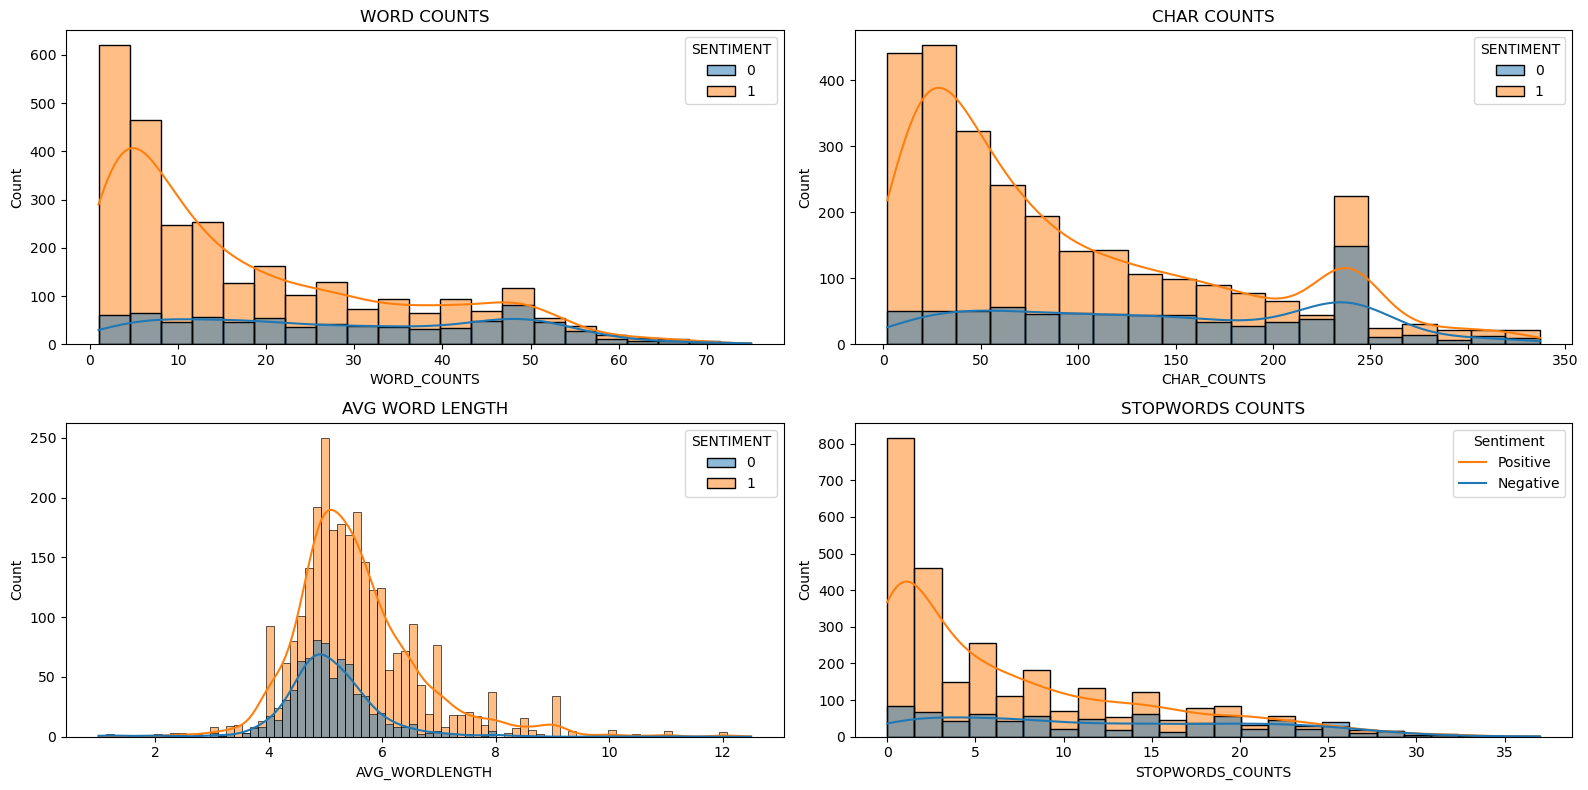

In [98]:
plt.figure(figsize=(16,8))

plt.subplot(2,2,1)
sns.histplot(data=df, x='WORD_COUNTS', hue='SENTIMENT', kde=True)
plt.title('WORD COUNTS')

plt.subplot(2,2,2)
sns.histplot(data=df, x='CHAR_COUNTS', hue='SENTIMENT', kde=True)
plt.title('CHAR COUNTS')

plt.subplot(2,2,3)
sns.histplot(data=df, x='AVG_WORDLENGTH', hue='SENTIMENT', kde=True)
plt.title('AVG WORD LENGTH')

plt.subplot(2,2,4)
sns.histplot(data=df, x='STOPWORDS_COUNTS', hue='SENTIMENT', kde=True)
plt.title('STOPWORDS COUNTS')

# Add a legend
plt.legend(title='Sentiment', labels=['Positive', 'Negative'])

plt.tight_layout()
plt.show()


In [99]:
#df['reviews_length'] = df['REVIEW'].astype(str).apply(len)


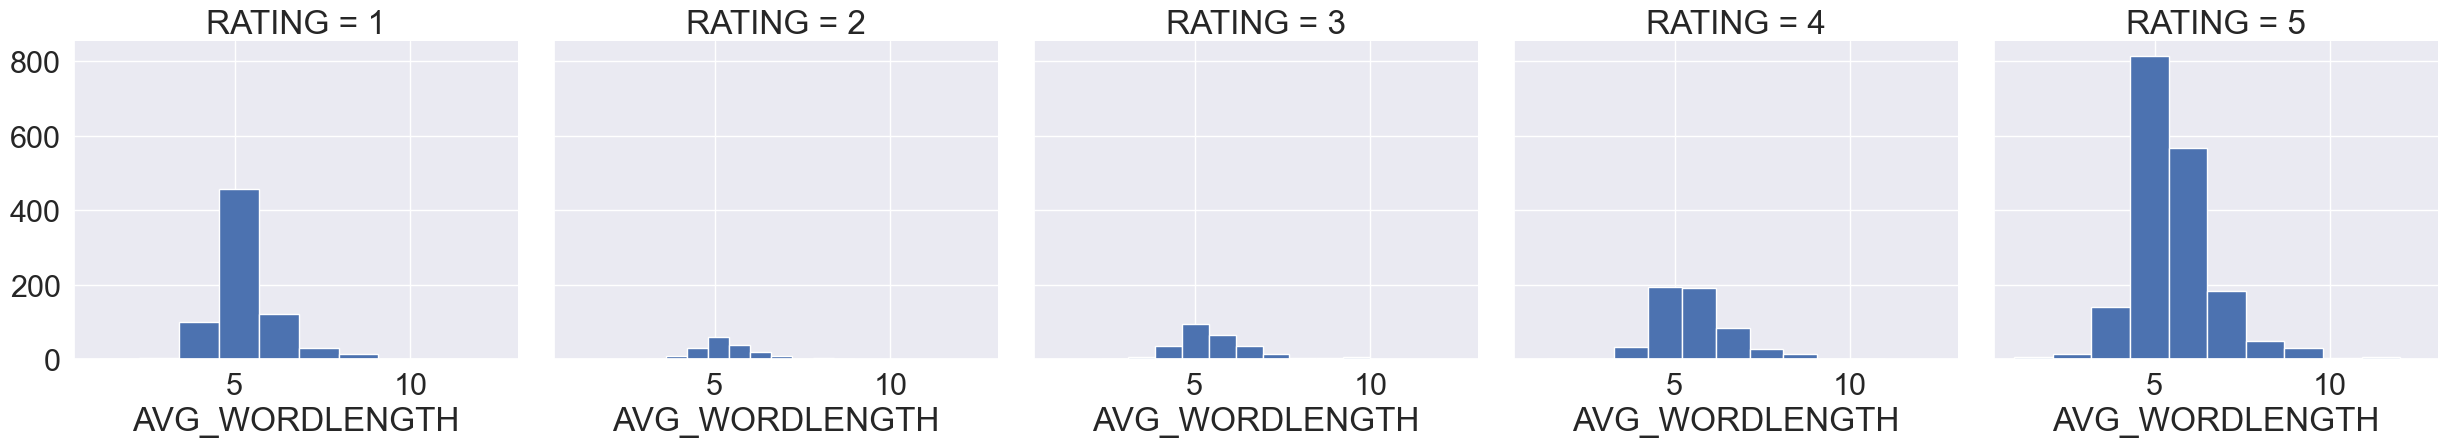

In [100]:

#Now let's have a look what do the length of the reviews tell about the ratings
sns.set(font_scale=2.0)

g = sns.FacetGrid(df, col='RATING', height=5)
g.map(plt.hist, 'AVG_WORDLENGTH')

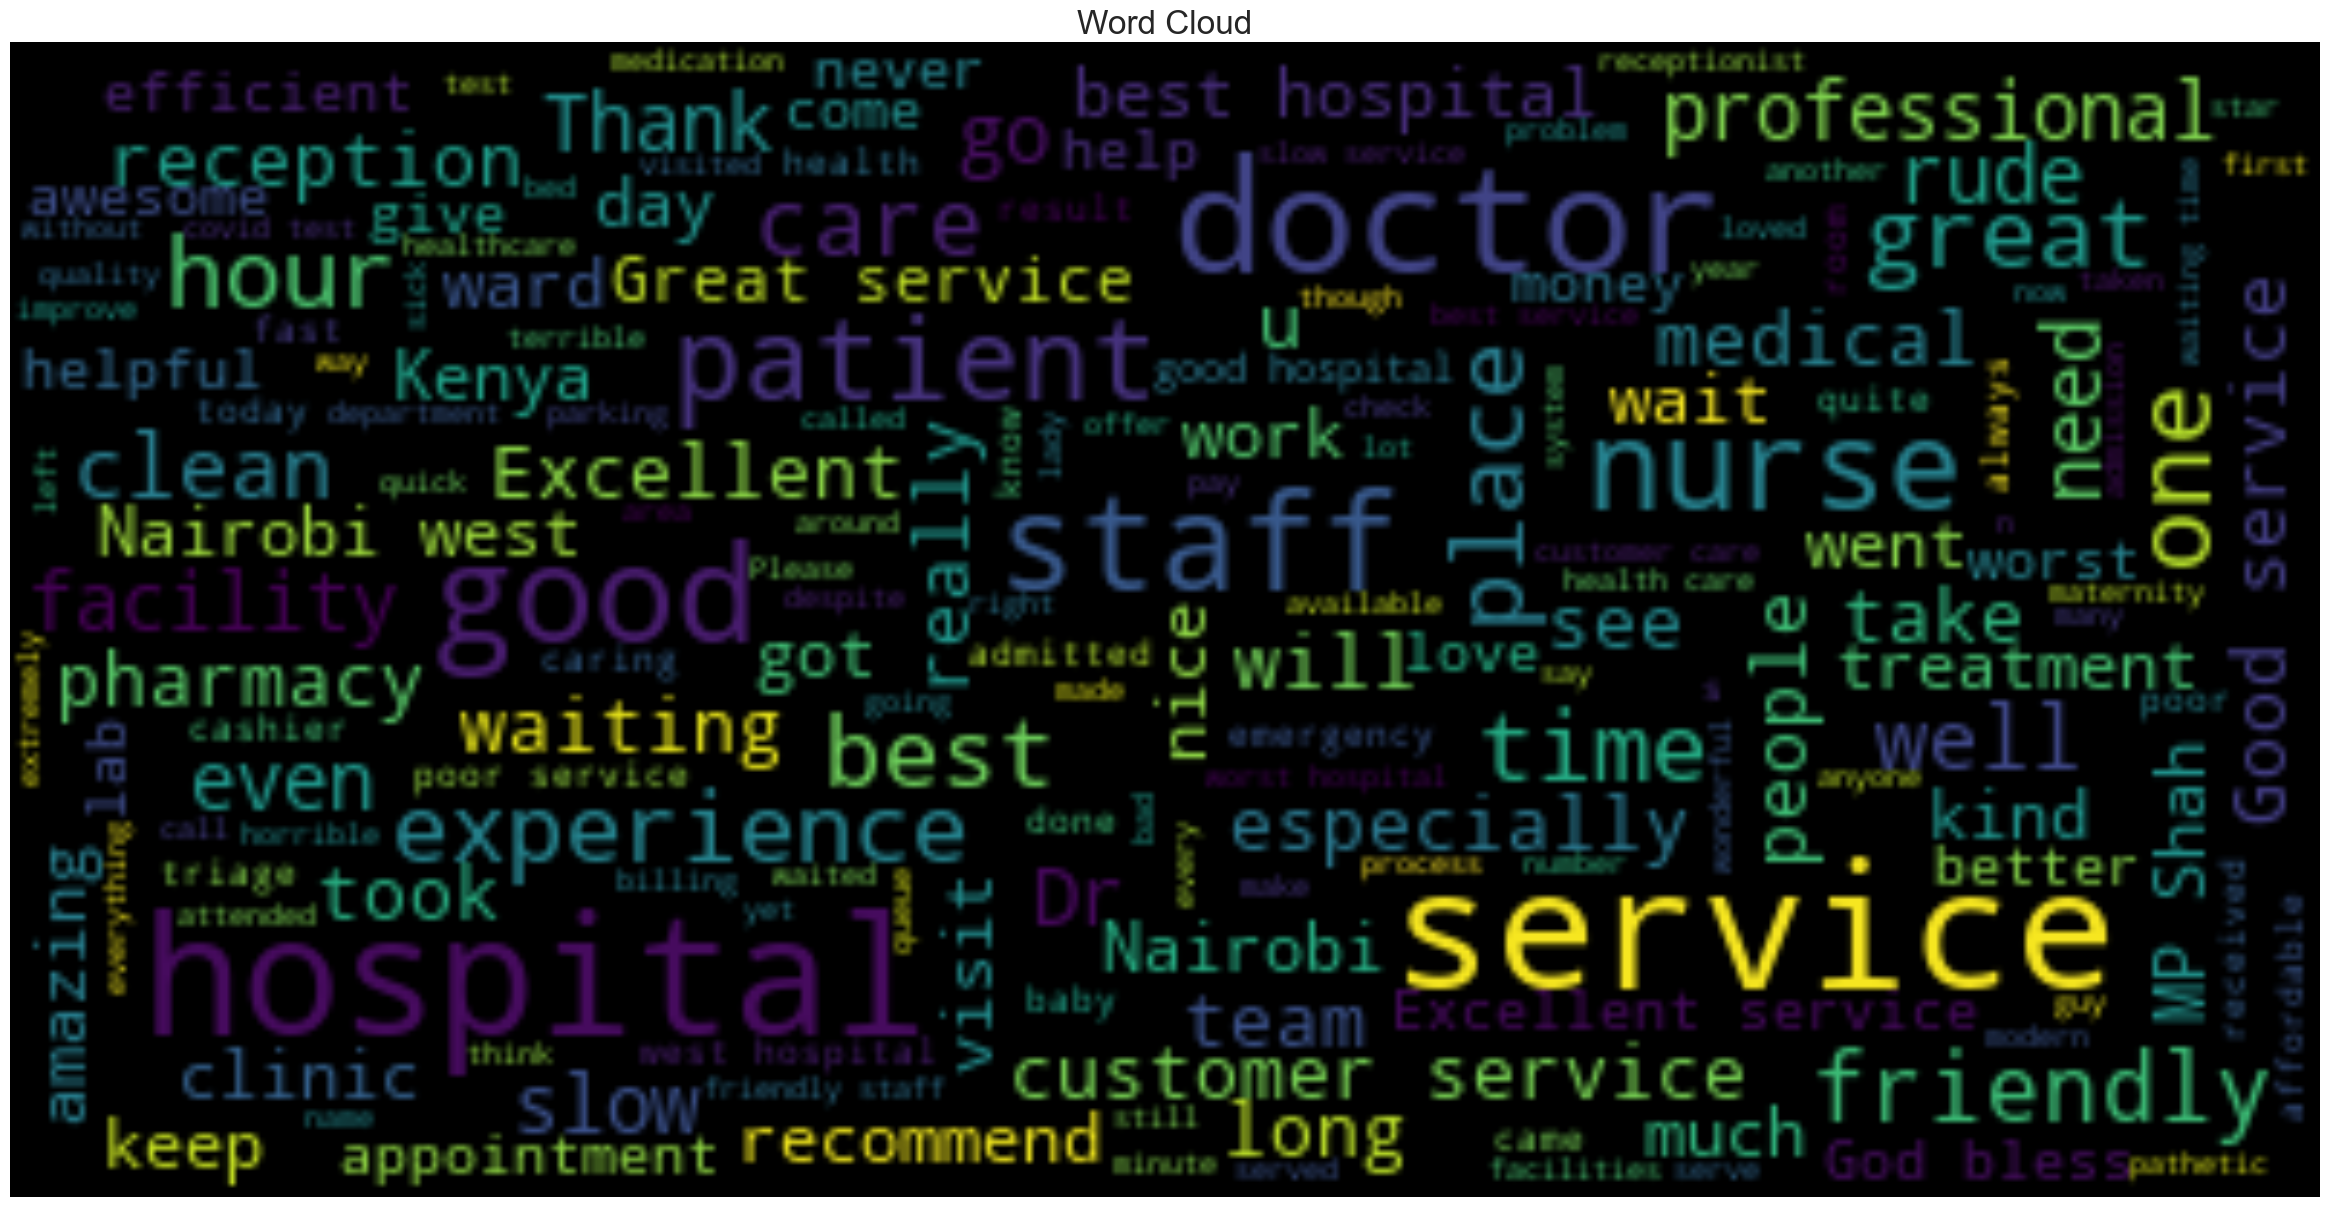

In [101]:
from wordcloud import WordCloud
#What are the words that people have used the most in their reviews ?
# 2. Word Cloud Generation
text = " ".join(i for i in df['REVIEW'])
wordcloud = WordCloud(max_font_size=30, max_words=200, background_color='black').generate(text)
plt.figure(figsize=(40, 15))
plt.imshow(wordcloud, interpolation="bilinear")
plt.title("Word Cloud")
plt.axis("off")
plt.show()


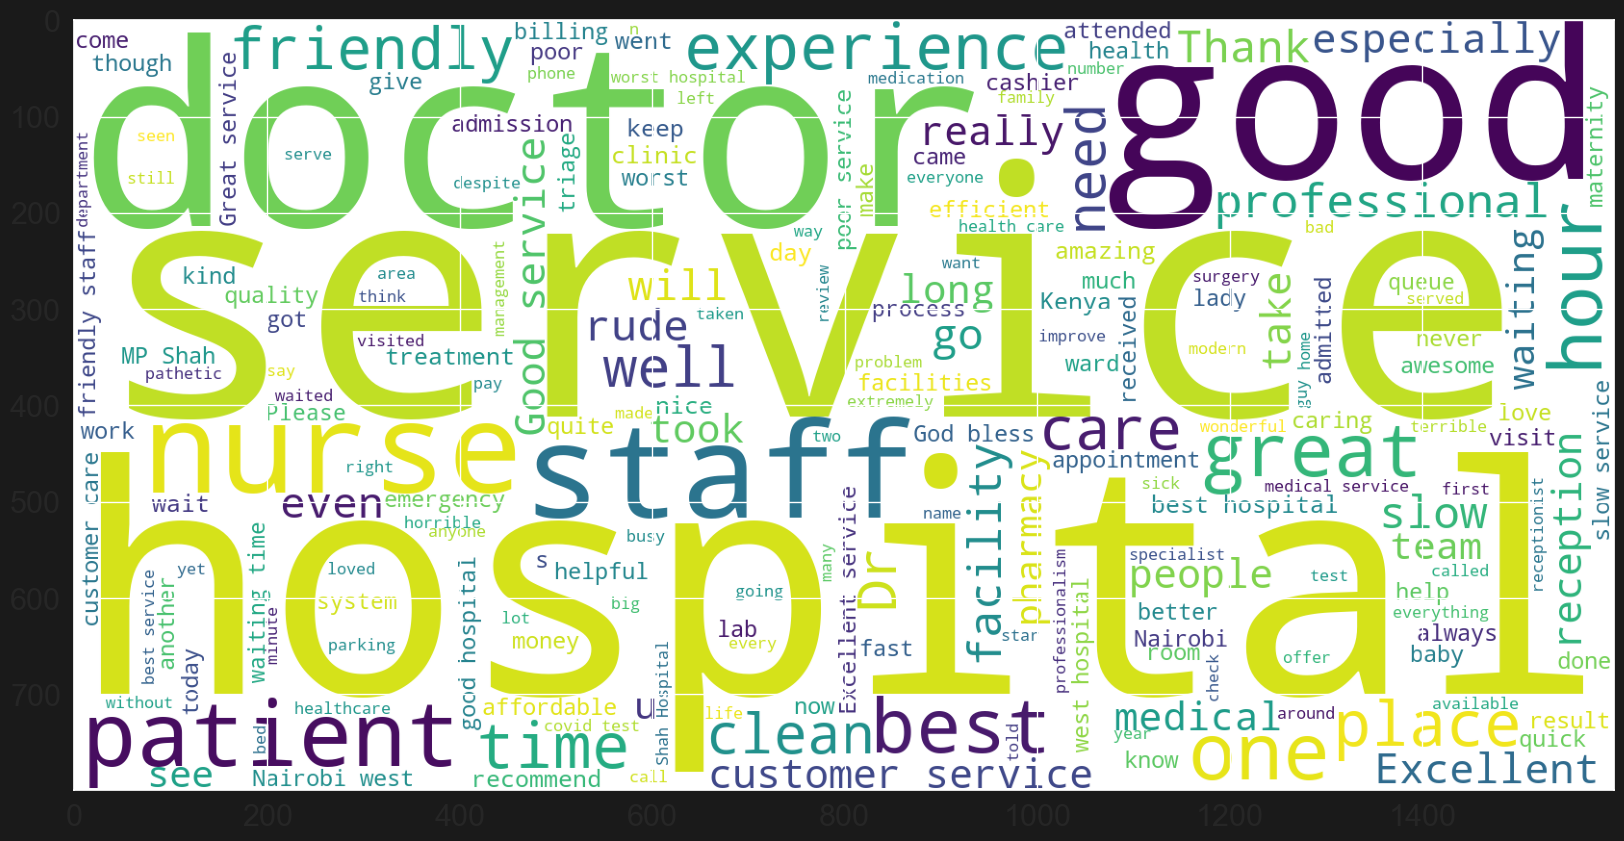

In [102]:
wordcloud = WordCloud(background_color="white",width=1600, height=800).generate(' '.join(df['REVIEW'].tolist()))
plt.figure( figsize=(20,10), facecolor='k')
plt.imshow(wordcloud)

<Axes: title={'center': 'Sentiment Polarity Distribution'}, ylabel='Frequency'>

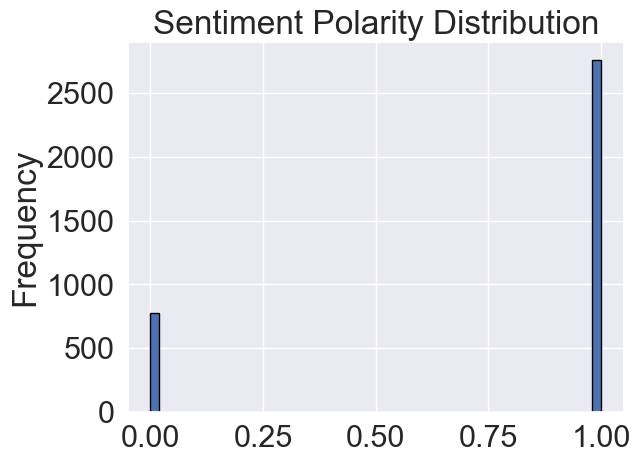

In [103]:
df['SENTIMENT'].plot(
    kind='hist',
    bins=50,
    edgecolor='black',
    title='Sentiment Polarity Distribution')

<Axes: title={'center': 'Rating Distribution'}, ylabel='Frequency'>

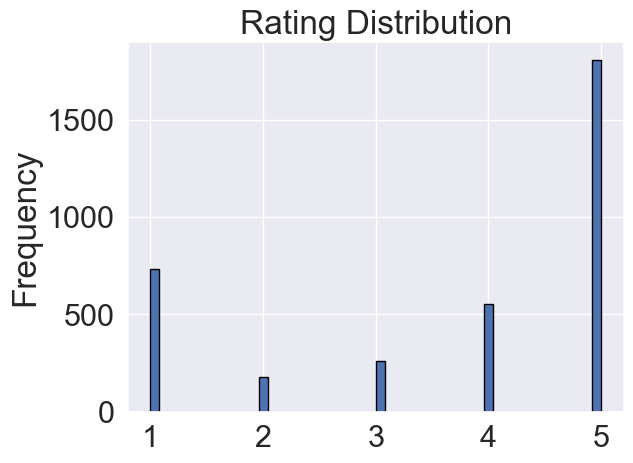

In [104]:
'''Analyzing text statistics
Text statistics visualizations are simple but very insightful techniques. 

They include:

word frequency analysis,
sentence length analysis,
average word length analysis'''
#The distribution of review ratings
df['RATING'].plot(
    kind='hist',
    bins=50,
    edgecolor='black',
    title='Rating Distribution')


<Axes: title={'center': 'Review Text Length Distribution'}, ylabel='Frequency'>

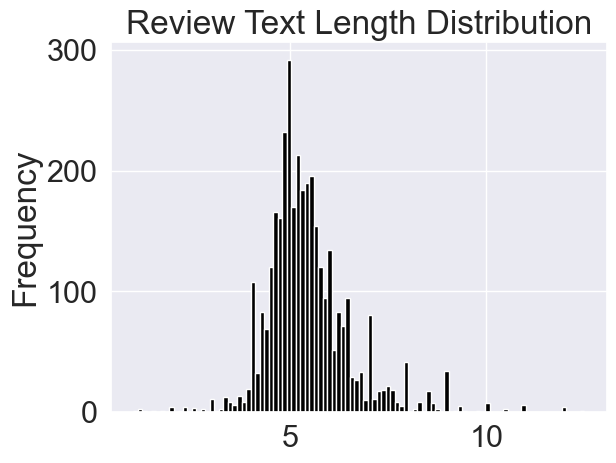

In [105]:
df['AVG_WORDLENGTH'].plot(
    kind='hist',
    bins=100,
    x='AVG_WORDLENGTH',
    color='black',
    y='count',
    title='Review Text Length Distribution')

In [106]:
%pip install nbformat>=4.2.0
import plotly.express as px
fig = px.histogram(df, x="AVG_WORDLENGTH", color='SENTIMENT', title='Distribution of Sentiment polarity of reviews based on reviews_length', nbins=200, width=600, height=400)

fig.show()

Note: you may need to restart the kernel to use updated packages.


SPLIT THE DATA INTO TRAIN AND TEST


In [107]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                   stratify=y, random_state=42)

In [108]:
from sklearn.linear_model import LogisticRegression

#Building a logistic regression model
model = LogisticRegression()

In [109]:
#fitting the model
model.fit(X_train, y_train)

LogisticRegression()

In [110]:
train_pred = model.predict(X_train)

In [111]:
from sklearn.metrics import accuracy_score
accuracy_score(y_train, train_pred)

0.919646017699115

(<Figure size 640x480 with 1 Axes>,
 <Axes: xlabel='predicted label', ylabel='true label'>)

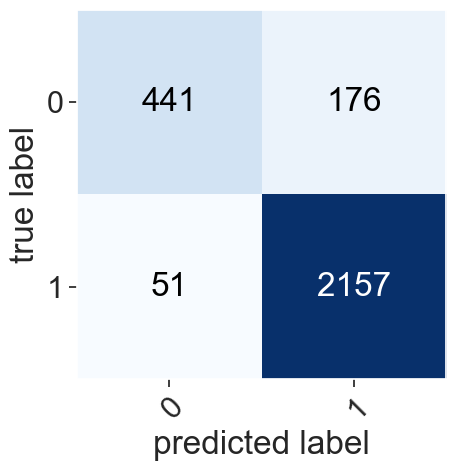

In [112]:
#%pip install mlxtend
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix
cm = metrics.confusion_matrix(y_train, train_pred)
plot_confusion_matrix(cm, class_names=model.classes_)

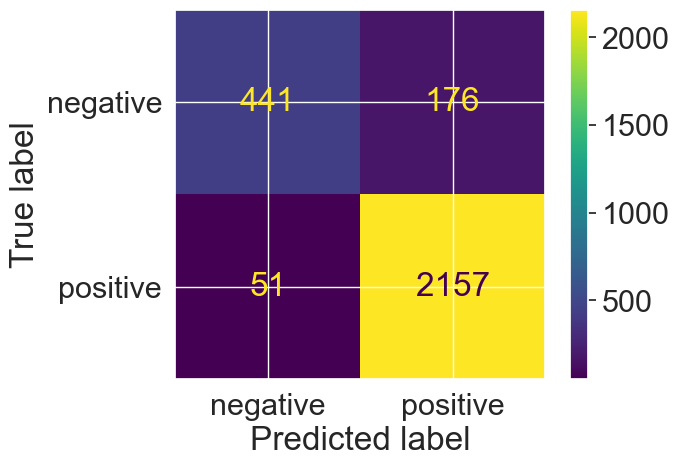

In [113]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_train, train_pred)
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix= cm, display_labels=['negative','positive'])
cm_display.plot()
plt.show()

In [114]:
print(metrics.confusion_matrix(y_train, train_pred))


[[ 441  176]
 [  51 2157]]


In [115]:
#Observation
#the method metrics.confusion_matrix comes up with square matrix
#shown above where x_text is our row and Y_predict is column
#Correctly predicted 0 patients to be positive(True Positive)and
#420 patient reviews to be negative(True negative)
#Correctly predicteed 0 patients to be positive(False positive)and
#and 8 to be negative reviews(False negative).

In [116]:
#Recall Value calculation = recall(for negative patients)=TP/(TP+FN)
#420/(420+0)= 1
#Recall (for positive)= TP/(TP+FN)
#0/(0+8)= 0
#The model is performing poorly in positive because of lack of sufficient data 
#being available in the in sentiment classifier
#precision (for negative reviews) = TP/(TP+FP)= 420/(420+0)= 1
#PRECISION FOR (Positive reviews) = TP/(TP+FP)= 0/(0+0)=0

In [117]:
# the coefficient of train data is greator than 0.90. 
# Meaning the model is not bad since it is closer to 1
model.score(X_train, y_train)

0.919646017699115

In [118]:
from sklearn.metrics import mean_squared_error
import math

math.sqrt(mean_squared_error(y_train, train_pred))
#this means that the model predicts with a standard deviation of 0.28347

0.2834677800048622

In [119]:
#Evaluating how well the model performed predictive analytics
#by running a classification report and ROC curve.
#Classification report
#Accuracy is a score to evaluate the model's performance.
#the higher it is the better.
#Recall measures the model's ability to correctly predict the true positive values
#Precision is the ratio of true positives to the sum both true and false positives.
#F1-score combines precision and recall into one metric and its value should be closest to 1, the better.
#Support is the number of actual occurrences of each class in the Dataset.
#calling the scores and inserting them in lines of code


In [120]:
#displaying the accuraqcy i got by comparing test result Y_train
# and predicted result of train_pred
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report

#print("Accuracy : ", metrics.accuracy_score(Y_train, train_pred))
#print("Precision : ", metrics.precision_score(Y_train, train_pred, average = 'weighted', zero_division=1))
#print("Recall : ", metrics.recall_score(Y_train, train_pred, average = 'weighted'))
print(classification_report(y_train, train_pred))
#print("CL Report :", metrics.classification_report(Y_train, train_pred, zero_division =1))

              precision    recall  f1-score   support

           0       0.90      0.71      0.80       617
           1       0.92      0.98      0.95      2208

    accuracy                           0.92      2825
   macro avg       0.91      0.85      0.87      2825
weighted avg       0.92      0.92      0.92      2825



In [121]:
test_pred = model.predict(X_test)


In [122]:
accuracy_score(y_test, test_pred)

0.8316831683168316

In [123]:
#Saving both the model and the vectorizer to disk
import os
# Create the 'Output' directory if it doesn't exist
os.makedirs('Output', exist_ok=True)
with open('Output/binary_count_vect.pkl', 'wb') as f:
    pickle.dump(vect, f)
with open('Output/binary_count_vect_lr.pkl', 'wb') as f:
    pickle.dump(model, f)

In [124]:
#i will take the non binary bag of words and see how the model looks like
#BAG OF WORDS 2 without binary
#
vect = CountVectorizer(min_df=5)
X = vect.fit_transform(clean_reviews)




In [125]:

X_a = X.toarray()

In [126]:
clean_reviews[13]

'guardsstaff could give proper direct inquir wast hour direct wrong place took ticket told need start afresh elsewher go anoth hospit'

In [127]:
# checking the index of the word in the vocabulary
#there are 2 staff in the above reviews
#so i look at the index of it
index = np.where(vect.get_feature_names_out() == 'staff')[0][0]
index

811

In [128]:
#verifying the position whether its correct
X_a[13, index]

0

In [129]:
X_a[13, :]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [130]:
#splitting the data into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2,
                                                    stratify=y, random_state=42)

In [131]:
#creating a logisticRegression Model
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [132]:
#fitting the model by calculating train and test predictions
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)
print(f'Train Accuracy: {accuracy_score(Y_train, train_pred)}')
print(f'Test Accuracy: {accuracy_score(Y_test, test_pred)}')

Train Accuracy: 0.9221238938053097
Test Accuracy: 0.8330975954738331


In [133]:
# Create the 'Output' directory if it doesn't exist
os.makedirs('Output', exist_ok=True)
with open('Output/non-binary_count_vect.pkl', 'wb') as f:
    pickle.dump(vect, f)
with open('Output/non-binary_count_vect_lr.pkl', 'wb') as f:
    pickle.dump(model, f)

the model has actually maintained the accuracy


In [134]:
#BAG OF N-GRAMS
#I will use the n-grams to see how the model will perform
#so i will increase size of the vocabulary by using BIGRAMS
#IT HELPS TO CAPTURE THE CONTEXT OF THE WORDS to increase the number of words i take.
#i will take a range of n grams that is 1,2 and 3 grams

#N-GRAMS

In [135]:
vect = CountVectorizer(ngram_range=(1,3), min_df=5)
X = vect.fit_transform(clean_reviews)

In [136]:
#THE VOCABULARY HAS INCREASED BECAUSE OF INCREASING BIGRAMS
X.shape

(3532, 1579)

In [137]:
#checking combinations of all three n-grams
vect.vocabulary_

{'got': 565,
 'best': 126,
 'servic': 1193,
 'environ': 400,
 'also': 59,
 'seren': 1189,
 'nt': 912,
 'even': 408,
 'realiz': 1098,
 're': 1093,
 'hospit': 631,
 'felt': 468,
 'home': 624,
 'attend': 99,
 'without': 1532,
 'appoint': 84,
 'got best': 566,
 'best servic': 142,
 'nt even': 914,
 'got best servic': 567,
 'aga': 45,
 'khan': 732,
 'univers': 1447,
 'parkland': 978,
 'nairobi': 873,
 'medic': 830,
 'institut': 706,
 'impress': 690,
 'mani': 814,
 'front': 504,
 'outstand': 968,
 'moment': 854,
 'arriv': 93,
 'staff': 1298,
 'except': 425,
 'level': 771,
 'profession': 1052,
 'aga khan': 46,
 'khan univers': 734,
 'univers hospit': 1448,
 'hospit parkland': 662,
 'aga khan univers': 48,
 'horribl': 628,
 'experi': 431,
 'care': 187,
 'possibl': 1034,
 'rate': 1091,
 'would': 1556,
 'liter': 779,
 'person': 1006,
 'brought': 168,
 'left': 767,
 'entranc': 399,
 'minut': 848,
 'rang': 1090,
 'come': 238,
 'horribl experi': 629,
 'use': 1459,
 'great': 573,
 'today': 1407,
 'b

In [138]:
#splitting the data into train and test

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2,
                                                    stratify=y, random_state=42)

In [139]:
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [140]:
#fitting the model by calculating train and test predictions
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)
print(f'Train Accuracy: {accuracy_score(Y_train, train_pred)}')
print(f'Test Accuracy: {accuracy_score(Y_test, test_pred)}')

#the model has improved the accuracy

Train Accuracy: 0.9387610619469027
Test Accuracy: 0.8345120226308345


In [141]:
#saving the model and the vectorizer to disk
os.makedirs('Output', exist_ok=True)
with open('Output/n_gram.pkl', 'wb') as f:
    pickle.dump(vect, f)
with open('Output/n_gram_lr.pkl', 'wb') as f:
    pickle.dump(model, f)

In [142]:
#in summary,n-grams can combine vocabulary to increase the number of words in the vocabulary into 2,3 dimensions and it is possible to go further to 4 but 
#due to the small dataset size, the model will be overfitting and the model will not be able to generalize well.


In [143]:
#TF-IDF
#I will use the TF-IDF to see how the model will perform
#if one word occurs more than once in the document it means that the word is useful and important
#i will use term frequency given(token, document) and inverse document frequency given(token, corpus)
#i will use the TfidfVectorizer to convert the text into a matrix of TF-IDF features
#

In [144]:
from sklearn.feature_extraction.text import TfidfVectorizer
#using scikit-learn library to perform the TF-IDF technique
vect = TfidfVectorizer(min_df=5)

In [145]:
X = vect.fit_transform(clean_reviews)

In [146]:
X.shape

(3532, 965)

In [147]:
#splitting into train and test

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2,
                                                    stratify=y, random_state=42)
model = LogisticRegression()
model.fit(X_train, Y_train)
#fitting the model by calculating trainand test predictions

LogisticRegression()

In [148]:
train_pred = model.predict(X_train)
test_pred = model.predict(X_test)
print(f'Train Accuracy: {accuracy_score(Y_train, train_pred)}')
print(f'Test Accuracy: {accuracy_score(Y_test, test_pred)}')

Train Accuracy: 0.8732743362831858
Test Accuracy: 0.8359264497878359


In [149]:
os.makedirs('Output', exist_ok=True)
with open('Output/tf-idf.pkl', 'wb') as f:
    pickle.dump(vect, f)
with open('Output/tf-idf_lr.pkl', 'wb') as f:
    pickle.dump(model, f)

so i have trained so far 4 models and saved all of them to file
so im gona load the model and test it for new data that is not from the training set.


PREDICTIONS ON NEW REVIEWS


In [260]:
#sample reviews
test_review_1 = '''i will never go back to Nairobi Hospital again'''

test_review_2 = '''don't go there their services are not worth it'''

In [261]:
#loading the best model and vectorizer
vect = pickle.load(open('Output/tf-idf.pkl', 'rb'))
model = pickle.load(open('Output/tf-idf_lr.pkl', 'rb')) 

In [262]:
#converting the reviews to a batch of one record
test_review_1 = [test_review_1]
test_review_2 = [test_review_2]

In [263]:
#converting the text to lower case
test_review_1 = [r.lower() for r in test_review_1]
test_review_2 = [r.lower() for r in test_review_2]

In [264]:
#Tokenizing the text
token_1 = [word_tokenize(r) for r in test_review_1]
token_2 = [word_tokenize(r) for r in test_review_2]

In [265]:
#removing stopwords
tokens_1 = [[word for word in t if word not in sw] for t in token_1]
tokens_2 = [[word for word in t if word not in sw] for t in token_2]

In [266]:
#removing punctuations
tokens_1 = [["".join(tokenizer.tokenize(word))for word in t 
           if len(tokenizer.tokenize(word))>0]for t in tokens_1]

In [267]:
tokens_2 = [["".join(tokenizer.tokenize(word))for word in t 
           if len(tokenizer.tokenize(word))>0]for t in tokens_2]

In [268]:
#stemming tokens
tokens_1 = [[porter.stem(word) for word in t] for t in tokens_1]
tokens_2 = [[porter.stem(word) for word in t] for t in tokens_2]

In [269]:
tokens_1

[['never', 'go', 'back', 'nairobi', 'hospit']]

In [270]:
test_review_1

['i will never go back to nairobi hospital again']

In [271]:
tokens_2

[['nt', 'go', 'servic', 'worth']]

In [272]:
test_review_2

["don't go there their services are not worth it"]

In [273]:
#joining them to form clean reviews
clean_review_1 = [" ".join(t) for t in tokens_1]
clean_review_2 = [" ".join(t) for t in tokens_2]

In [274]:
#transforming the text using vectorizer and making predictions

#note: prediction probability for positive class is high for the first test review
X_test = vect.transform(clean_review_1)

In [275]:
X_test.shape

(1, 965)

In [276]:
#printing probability for positive class which is 0.657746
model.predict_proba(X_test)


array([[0.46400279, 0.53599721]])

In [277]:
#prediction of classification
model.predict(X_test)

array([1], dtype=int64)

In [278]:
#Note : prediction probability for negative class is high for the second test review
X_test1 = vect.transform(clean_review_2)

In [279]:
X_test1.shape

(1, 965)

In [280]:
model.predict_proba(X_test1)

array([[0.44181632, 0.55818368]])

In [281]:
model.predict(X_test1)

array([1], dtype=int64)